In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error

#import torch
#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader
#from torch.utils.data import random_split
#from torch.nn import Module
#from torch.nn import Linear
#from torch.nn import MSELoss
#from torch.optim import SGD
from autogluon.tabular import TabularDataset, TabularPredictor

c:\users\ivan\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('2. job_fair_retention_prediction_2022_training.csv')

In [19]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'date': 106,
 'registration_type': 3,
 'played_t11_before': 3,
 'registration_channel': 3,
 'network_type': 4,
 'device_tier': 5,
 'device_type': 2,
 'device_manufacturer': 14,
 'screen_dpi': 355,
 'device_memory_size_mb': 1942,
 'device_model': 3236,
 'os_version': 79,
 'registrations': 45,
 'returned': 19}

In [3]:
data.drop(['device_model','os_version'], axis = 1, inplace = True)
dates = data['date']
data.drop('date', axis = 1, inplace = True)
print(data.size)
print(dates.size)
dates

3765652
342332


0         2022-06-02
1         2022-06-02
2         2022-06-02
3         2022-06-02
4         2022-06-02
             ...    
342327    2022-09-15
342328    2022-09-15
342329    2022-09-15
342330    2022-09-15
342331    2022-09-15
Name: date, Length: 342332, dtype: object

In [4]:
data_train = data[:293051]
data_train

,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
0,3,0,1,1,3,1,2,320.0,2820.0,1,1
1,1,2,1,1,4,1,0,480.0,2740.0,1,0
2,3,0,1,1,3,1,1,315.0,3571.0,1,0
3,1,2,2,1,2,1,10,320.0,3774.0,1,1
4,1,2,2,1,1,1,1,320.0,889.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
293046,1,2,1,1,2,2,0,160.0,1994.0,1,0
293047,1,2,2,1,3,1,2,440.0,5656.0,2,0
293048,1,2,2,1,2,1,4,408.0,3673.0,1,1
293049,3,0,2,1,4,1,1,357.0,5620.0,2,1


<AxesSubplot:>

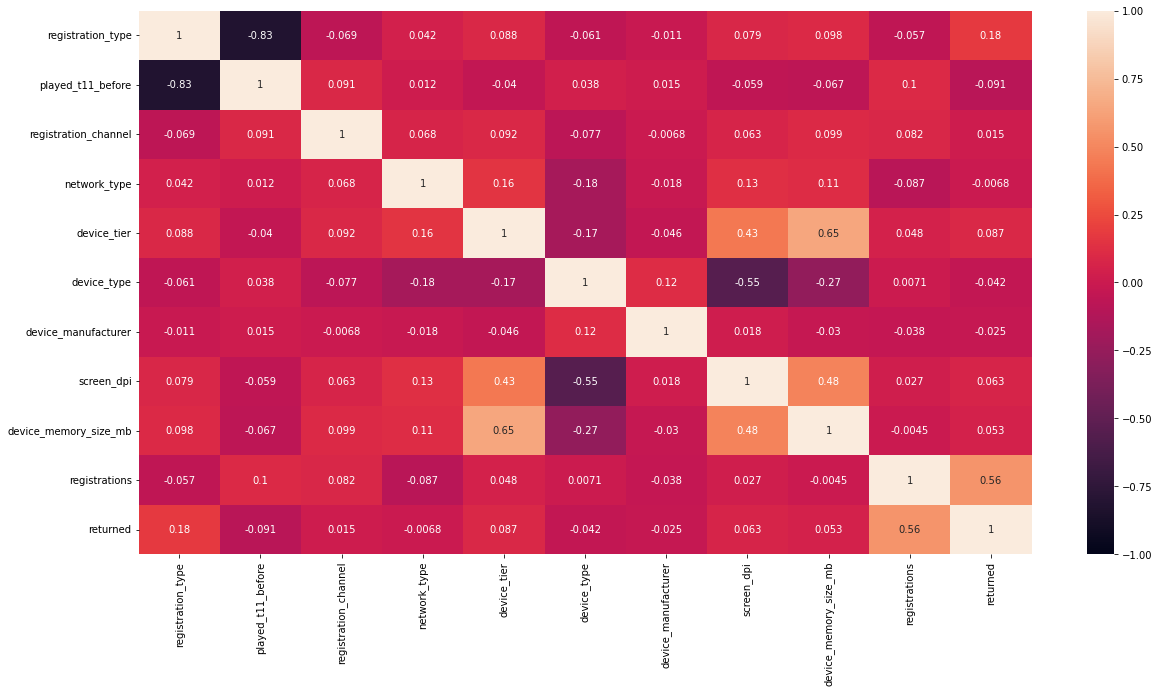

In [6]:
corr = data_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [5]:
dates_organized = set(dates)
dates_list = sorted(dates_organized)
solved_dates_unique = dates_list[:-15]
solved_dates = dates[:293051]


In [6]:
registrations2 = data_train['registrations']
returned2 = data_train['returned']

In [9]:
retentions2 = []
psum = 0
rsum = 0
for i in range(len(solved_dates_unique)):
    for j in range(solved_dates.array.size):
        if(solved_dates.array[j] == solved_dates_unique[i]):
            psum += returned2.array[j]
            rsum += registrations2.array[j]
    retentions2.append(round((psum/rsum)*100, 3))
    psum = 0
    rsum = 0
print(retentions2)

[30.283, 29.759, 28.607, 26.631, 27.6, 29.778, 30.695, 29.828, 30.736, 30.269, 30.269, 28.377, 28.993, 29.719, 29.252, 27.999, 27.469, 29.06, 29.497, 29.385, 30.171, 30.298, 33.98, 30.895, 31.206, 31.002, 30.558, 29.827, 28.913, 27.73, 27.418, 28.916, 28.043, 30.972, 31.631, 28.633, 29.281, 28.641, 29.993, 30.311, 30.733, 32.131, 31.774, 30.331, 30.831, 32.712, 32.194, 30.769, 29.648, 29.249, 29.256, 29.822, 31.679, 29.517, 29.784, 30.167, 29.878, 28.977, 30.598, 30.236, 29.134, 32.177, 31.406, 31.061, 28.633, 26.836, 28.29, 27.822, 29.931, 29.765, 30.982, 30.131, 30.091, 30.3, 32.013, 32.51, 33.959, 33.785, 31.446, 31.032, 31.728, 30.516, 33.265, 31.933, 31.594, 29.568, 29.847, 31.53, 29.733, 31.18, 32.614]


In [10]:
data['registrations'] = data['registrations'].astype(float)
data['device_manufacturer'] = data['device_manufacturer'].astype(float)
data['registrations'] = data['registration_type'].astype(float)
data['device_manufacturer'] = data['device_manufacturer'].astype(float)
data['registrations'] = data['registration_type'].astype(float)
data['device_manufacturer'] = data['device_manufacturer'].astype(float)
data['registrations'] = data['registration_type'].astype(float)
data['device_manufacturer'] = data['device_manufacturer'].astype(float)
data['returned'] = data['returned'].astype(float)
data_train = data[:293051]
train_split = data_train[:-68466]
test_split = data_train[-68466:]

save_path = 'E:\Faks\Vestacka Inteligencija\Data Science Challenge\AutogluonModels'

train_data = TabularDataset(train_split)

test_data = TabularDataset(test_split)

predictor = TabularPredictor(label='returned', problem_type = 'regression', path = save_path).fit(train_data=train_data, presets='best_quality')

predictions = predictor.evaluate(test_data)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "E:\Faks\Vestacka Inteligencija\Data Science Challenge\AutogluonModels\"
AutoGluon Version:  0.6.0
Python Version:     3.9.2
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
Train Data Rows:    224585
Train Data Columns: 10
Label Column: returned
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12088.52 MB
	Train Data (Original)  Memory Usage: 17.97 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadat

In [7]:
data.drop('returned',axis = 1, inplace = True)
data_predict = data[293052:]

In [12]:
#predict_data = TabularDataset('predictdata.csv')
#predict_data.drop('returned' ,axis = 1, inplace = True)
predictor = TabularPredictor.load("E:\Faks\Vestacka Inteligencija\Data Science Challenge\AutogluonModels")
y_pred = predictor.predict(data_predict)
print("Predictions:  \n", y_pred)

Predictions:  
 293052    0.725987
293053    0.210096
293054    0.163035
293055    0.505758
293056    0.252681
            ...   
342327    0.283888
342328    0.188466
342329    0.179738
342330    0.391682
342331    0.669584
Name: returned, Length: 49280, dtype: float32


In [13]:
predsum = 0;
for i in y_pred:
    predsum +=i
print(predsum)

24826.341055862606


In [14]:
registrations = data_predict['registrations']

target_dates_unique = dates_list[-15:]

target_dates = dates[293052:]

print(target_dates_unique)
print(target_dates)

['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15']
293052    2022-09-01
293053    2022-09-01
293054    2022-09-01
293055    2022-09-01
293056    2022-09-01
             ...    
342327    2022-09-15
342328    2022-09-15
342329    2022-09-15
342330    2022-09-15
342331    2022-09-15
Name: date, Length: 49280, dtype: object


In [17]:
retentions = []
psum = 0
rsum = 0
for i in range(len(target_dates_unique)):
    for j in range(target_dates.array.size):
        if(target_dates.array[j] == target_dates_unique[i]):
            psum += y_pred.array[j]
            rsum += registrations.array[j]
    retentions.append(round((psum/rsum)*100, 4))
    psum = 0
    rsum = 0
print(retentions)

[32.7577, 33.0575, 32.5886, 31.4368, 32.06, 31.3889, 31.0623, 32.0134, 31.9632, 32.6485, 32.2346, 32.6169, 35.9232, 35.0784, 36.4737]


In [16]:
rows = []
fieldnames = ['date', 'retention_d1']
for i in range(len(target_dates_unique)):
    rows.append({'date' : target_dates_unique[i],'retention_d1' : retentions[i]})
with open('retention_d1_predictions.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames = fieldnames)
    writer.writerows(rows)